# [ 3. Image Cropping ]

- __[ 실습목표 ]__  
Housing 이미지의 크로핑을 참조하여 Cover 이미지의 크로핑을 시도해본다.

- __[ 실습 및 과제 내용 ]__  
1. Cover 이미지의 마스킹을 수행한다.
2. Autoencoder 학습을 위해 Cover 이미지의 Grid 크로핑을 수행한다.  
(Grid 의 사이즈는 512 x 512 의 정사각형이다.)

---

In [1]:
import os
import pathlib
import sys

default_dir_path = str(pathlib.Path(os.getcwd()).parent.absolute())

sys.path.append(default_dir_path)

from properties import *

[2020-12-22 14:00:27,269][INFO][properties.py:30] Complete to apply the random seed, RANDOM_SEED : 777


In [2]:
from cropping.image_data import *
from cropping.cropper.housing.cam1_cropper import *
from dataset.dataframe import DataFrameFactory
from dataset.dataset import EOPDataset

import time


LABEL_PATH = DATASET_PROPERTIES.LABEL_PATH

HOUSING_NG_PATH = DATASET_PROPERTIES.HOUSING_NG_PATH
HOUSING_OK_PATH = DATASET_PROPERTIES.HOUSING_OK_PATH

COVER_NG_PATH = DATASET_PROPERTIES.COVER_NG_PATH
COVER_OK_PATH = DATASET_PROPERTIES.COVER_OK_PATH

# 1. Housing

## Dataset

In [3]:
label_df = DataFrameFactory.get_label_df(label_path=DATASET_PROPERTIES.LABEL_PATH, sep=",")
housing_cam1_NG_image_path_dict = DataFrameFactory.get_image_path_dict(dir_path=DATASET_PROPERTIES.HOUSING_NG_PATH, cam_number=1)
housing_cam1_NG_df = DataFrameFactory.get_data(cam_num=1, image_path_dict=housing_cam1_NG_image_path_dict, label_df=label_df, is_NG=True)

In [4]:
housing_cam1_NG_df

,serial_number_list,image_path_list,is_NG_list,cam_list,defect_category_list,x_st_list,x_ed_list,y_st_list,y_ed_list,ratio_list
0,20H31B2C4590C,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,1,1,[3],[76],[81],[67],[71],[0.341364]
1,20H31B2C4682B,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,1,1,[3],[105],[109],[172],[176],[0.341364]
2,20H31B2C4907C,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,1,1,[3],[116],[119],[101],[105],[0.341364]
3,20H31B2C4930B,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,1,1,"[3, 3]","[100, 69]","[103, 73]","[45, 91]","[48, 95]","[0.341364, 0.341364]"
4,20H31B2C4945C,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,1,1,[3],[210],[214],[78],[82],[0.341364]


In [5]:
housing_cam1_dataset = EOPDataset(data_dict=housing_cam1_NG_df)

In [6]:
eop_data = housing_cam1_dataset[0]
eop_data

serial_number: 20H31B2C4590C 
img_object: Absolute Bounding Box : x_st: 0 
x_ed: 2399 
y_st: 0 
y_ed: 2199 
left_up: (0, 0) 
right_up: (2399, 0) 
left_down: (0, 2199) 
right_down: (2399, 2199) 
center: (1199, 1099)
Defect List : [] 
is_NG: 1 
cam: 1 
defect_list: [x_st: 667 
x_ed: 711 
y_st: 588 
y_ed: 623 
left_up: (667, 588) 
right_up: (711, 588) 
left_down: (667, 623) 
right_down: (711, 623) 
center: (689, 605)] 

In [7]:
drawer = Drawer(eop_data.img_object)

In [8]:
drawer.draw_defect_list(eop_data.defect_list)

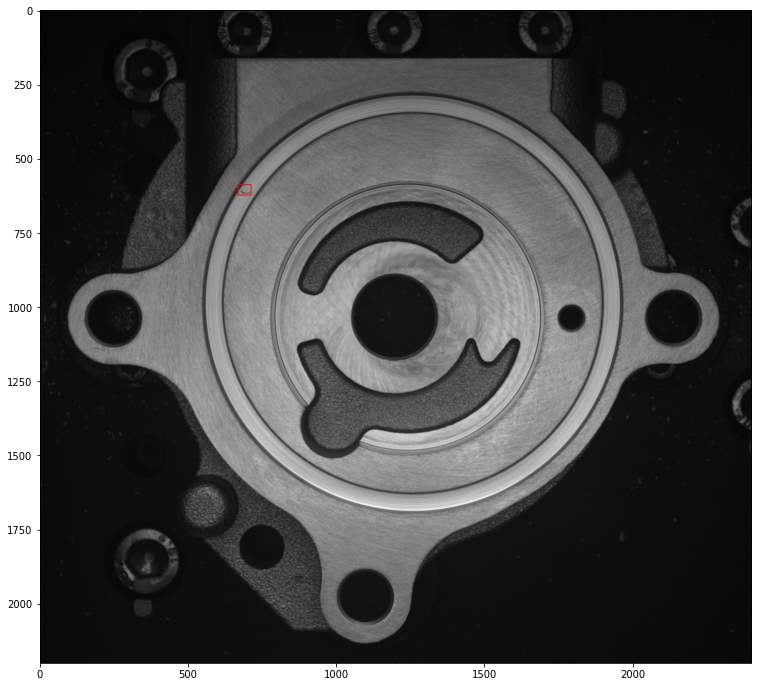

In [9]:
drawer.show(figsize=(23, 12))

In [10]:
img_object = eop_data.img_object
defect_list = eop_data.defect_list
total_time = 0

## Crop A Ring

In [11]:
cam1_cropper = HousingCam1CropperARingEntire(img_object=img_object, defect_list=defect_list)

time_st = time.time()
crop_A_ring_list = cam1_cropper.crop(
    big_rad=705,
    small_rad=639,
    center_coord=Coordinate(1254, 980)
)
time_ed = time.time()
elapsed_time = time_ed - time_st
total_time += elapsed_time
print(f"Elapsed Time : {elapsed_time}")

Elapsed Time : 0.037897586822509766


In [12]:
crop_A_ring_list

[Absolute Bounding Box : x_st: 549 
 x_ed: 1959 
 y_st: 275 
 y_ed: 1685 
 left_up: (549, 275) 
 right_up: (1959, 275) 
 left_down: (549, 1685) 
 right_down: (1959, 1685) 
 center: (1254, 980)
 Defect List : [x_st: 667 
 x_ed: 711 
 y_st: 588 
 y_ed: 623 
 left_up: (667, 588) 
 right_up: (711, 588) 
 left_down: (667, 623) 
 right_down: (711, 623) 
 center: (689, 605)]]

0 [x_st: 667 
x_ed: 711 
y_st: 588 
y_ed: 623 
left_up: (667, 588) 
right_up: (711, 588) 
left_down: (667, 623) 
right_down: (711, 623) 
center: (689, 605)]


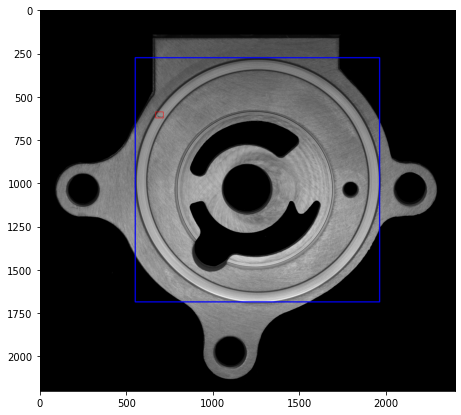

In [13]:
drawer = Drawer(img=img_object)
for i, crop_rotate_ring_piece in enumerate(crop_A_ring_list):
    print(i, crop_rotate_ring_piece.defect_list)
    drawer.draw_bounding_box(data=crop_rotate_ring_piece)
    drawer.draw_defect_list(crop_rotate_ring_piece.defect_list)
    
drawer.show()

[x_st: 667 
x_ed: 711 
y_st: 588 
y_ed: 623 
left_up: (667, 588) 
right_up: (711, 588) 
left_down: (667, 623) 
right_down: (711, 623) 
center: (689, 605)]


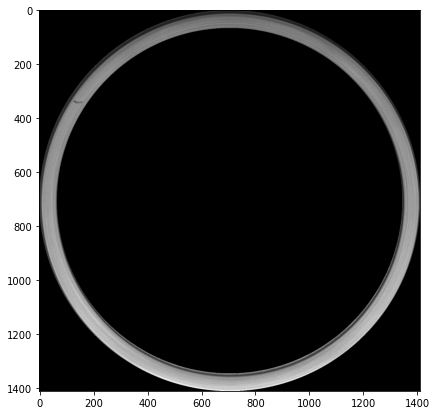

In [14]:
print(crop_A_ring_list[0].defect_list)
drawer = Drawer(img=crop_A_ring_list[0], is_base_img=False)
drawer.show()


## Crop D Inner Ring Entire

In [15]:
cam1_cropper = HousingCam1CropperDInnerRingEntire(img_object=img_object, defect_list=defect_list)

time_st = time.time()
crop_D_list = cam1_cropper.crop(
    inner_circle_rad=463,
    inner_circle_center_coord=Coordinate(1235, 1029),
    outer_circle_rad=645,
    outer_circle_center_coord=Coordinate(1254, 980),
    ring_small_rad=401
)
time_ed = time.time()
elapsed_time = time_ed - time_st
total_time += elapsed_time
print(f"Elapsed Time : {elapsed_time}")

Elapsed Time : 0.19747209548950195


In [16]:
crop_D_list

[Absolute Bounding Box : x_st: 609 
 x_ed: 1899 
 y_st: 335 
 y_ed: 1625 
 left_up: (609, 335) 
 right_up: (1899, 335) 
 left_down: (609, 1625) 
 right_down: (1899, 1625) 
 center: (1254, 980)
 Defect List : []]

0 []


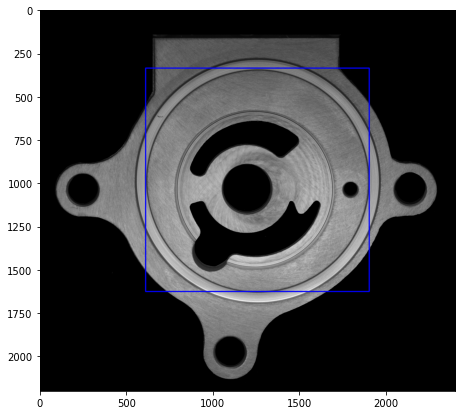

In [17]:
drawer = Drawer(img=img_object)
for i, crop_rotate_ring_piece in enumerate(crop_D_list):
    print(i, crop_rotate_ring_piece.defect_list)
    drawer.draw_bounding_box(data=crop_rotate_ring_piece)
    drawer.draw_defect_list(crop_rotate_ring_piece.defect_list)
    
drawer.show()

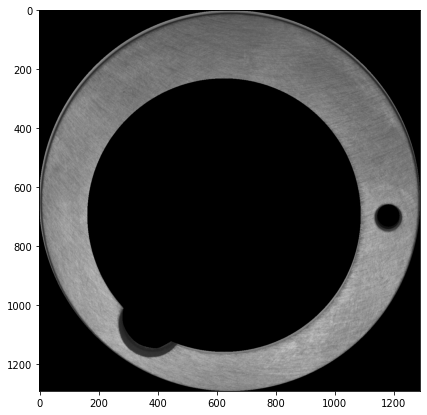

In [18]:
drawer = Drawer(img=crop_D_list[0], is_base_img=False)
drawer.show()

## Crop C Entire

In [19]:
cam1_cropper = HousingCam1CropperCEntire(img_object=img_object, defect_list=defect_list)

time_st = time.time()
crop_C_entire_list = cam1_cropper.crop(
    rad=463,
    center_coord=Coordinate(1235, 1029)
)
time_ed = time.time()
elapsed_time = time_ed - time_st
total_time += elapsed_time
print(f"Elapsed Time : {elapsed_time}")

Elapsed Time : 0.10433244705200195


0 []


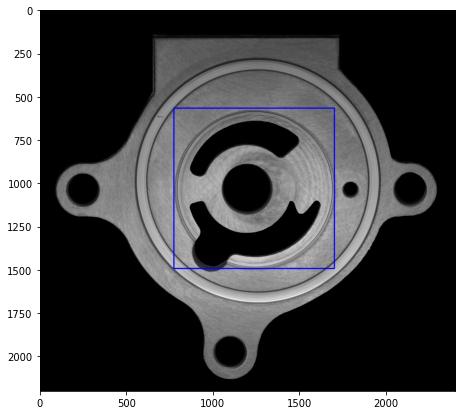

In [20]:
drawer = Drawer(img=img_object)
for i, crop_rotate_ring_piece in enumerate(crop_C_entire_list):
    print(i, crop_rotate_ring_piece.defect_list)
    drawer.draw_bounding_box(data=crop_rotate_ring_piece)
    drawer.draw_defect_list(crop_rotate_ring_piece.defect_list)
    
drawer.show()

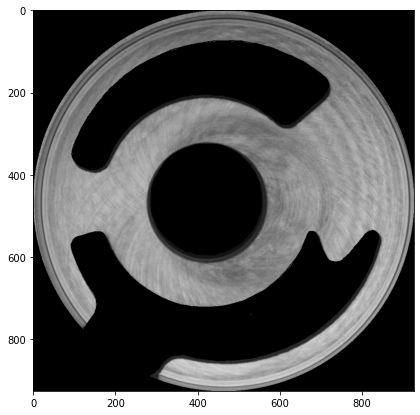

In [21]:
drawer = Drawer(img=crop_C_entire_list[0], is_base_img=False)
drawer.show()

## Grid

In [22]:
cam1_cropper = HousingCam1CropperGrid(img_object=img_object, defect_list=defect_list)

time_st = time.time()
crop_C_entire_list = cam1_cropper.crop(
    bbox_list=[
        # Square 1st
        BoundingBox(x_st=471, x_ed=471 + 512, y_st=150, y_ed=150 + 512),
        BoundingBox(x_st=965, x_ed=965 + 512, y_st=150, y_ed=150 + 512),
        BoundingBox(x_st=1459, x_ed=1459 + 512, y_st=150, y_ed=150 + 512),
        # Square 2nd
        BoundingBox(x_st=471, x_ed=471 + 512, y_st=644, y_ed=644 + 512),
        BoundingBox(x_st=965, x_ed=965 + 512, y_st=644, y_ed=644 + 512),
        BoundingBox(x_st=1459, x_ed=1459 + 512, y_st=644, y_ed=644 + 512),
        # Square 3rd
        BoundingBox(x_st=471, x_ed=471 + 512, y_st=1138, y_ed=1138 + 512),
        BoundingBox(x_st=965, x_ed=965 + 512, y_st=1138, y_ed=1138 + 512),
        BoundingBox(x_st=1459, x_ed=1459 + 512, y_st=1138, y_ed=1138 + 512),
        # Left
        BoundingBox(x_st=27, x_ed=27 + 512, y_st=577, y_ed=577 + 512),
        BoundingBox(x_st=27, x_ed=27 + 512, y_st=993, y_ed=993 + 512),
        # # Right
        BoundingBox(x_st=1791, x_ed=1791 + 512, y_st=547, y_ed=547 + 512),
        BoundingBox(x_st=1791, x_ed=1791 + 512, y_st=949, y_ed=949 + 512),
        # # Down
        BoundingBox(x_st=641, x_ed=641 + 512, y_st=1629, y_ed=1629 + 512),
        BoundingBox(x_st=1125, x_ed=1125 + 512, y_st=1629, y_ed=1629 + 512),
    ]
)
time_ed = time.time()
elapsed_time = time_ed - time_st
total_time += elapsed_time
print(f"Elapsed Time : {elapsed_time}")

Elapsed Time : 0.013963460922241211


0 [x_st: 667 
x_ed: 711 
y_st: 588 
y_ed: 623 
left_up: (667, 588) 
right_up: (711, 588) 
left_down: (667, 623) 
right_down: (711, 623) 
center: (689, 605)]
1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 []
13 []
14 []


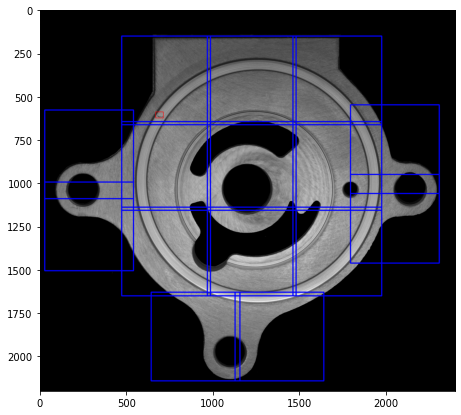

In [23]:
drawer = Drawer(img=img_object)
for i, crop_rotate_ring_piece in enumerate(crop_C_entire_list):
    print(i, crop_rotate_ring_piece.defect_list)
    drawer.draw_bounding_box(data=crop_rotate_ring_piece)
    drawer.draw_defect_list(crop_rotate_ring_piece.defect_list)
    
drawer.show()

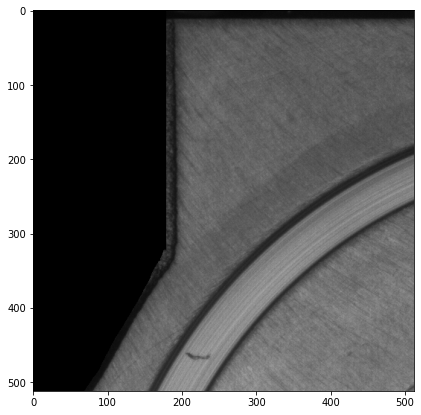

In [24]:
drawer = Drawer(img=crop_C_entire_list[0], is_base_img=False)
drawer.show()

# 2. Cover

## Dataset

In [25]:
label_df = DataFrameFactory.get_label_df(label_path=DATASET_PROPERTIES.LABEL_PATH, sep=",")
cover_cam1_OK_image_path_dict = DataFrameFactory.get_image_path_dict(dir_path=DATASET_PROPERTIES.COVER_OK_PATH, cam_number=1)
cover_cam1_OK_df = DataFrameFactory.get_data(cam_num=1, image_path_dict=cover_cam1_OK_image_path_dict, label_df=label_df, is_NG=False)

In [26]:
cover_cam1_OK_df

,serial_number_list,image_path_list,is_NG_list,cam_list,defect_category_list,x_st_list,x_ed_list,y_st_list,y_ed_list,ratio_list
0,20C18B2C0053,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,0,1,[0],[0],[0],[0],[0],[0]
1,20C18B2C0066,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,0,1,[0],[0],[0],[0],[0],[0]
2,20C18B2C0141,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,0,1,[0],[0],[0],[0],[0],[0]
3,20C18B2C0150,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,0,1,[0],[0],[0],[0],[0],[0]
4,20C18B2C0960,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,0,1,[0],[0],[0],[0],[0],[0]
5,20C18B2C0974,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,0,1,[0],[0],[0],[0],[0],[0]
6,20C18B2C1014,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,0,1,[0],[0],[0],[0],[0],[0]
7,20C18B2C1021,D:\AI_Lab\MH\git\newnewnew\Myunghwa-AI-Vision-...,0,1,[0],[0],[0],[0],[0],[0]


In [27]:
cover_cam1_dataset = EOPDataset(data_dict=cover_cam1_OK_df)

In [28]:
eop_data = cover_cam1_dataset[0]
eop_data

serial_number: 20C18B2C0053 
img_object: Absolute Bounding Box : x_st: 0 
x_ed: 3199 
y_st: 0 
y_ed: 2747 
left_up: (0, 0) 
right_up: (3199, 0) 
left_down: (0, 2747) 
right_down: (3199, 2747) 
center: (1599, 1373)
Defect List : [] 
is_NG: 0 
cam: 1 
defect_list: [] 

In [29]:
drawer = Drawer(eop_data.img_object)

In [30]:
drawer.draw_defect_list(eop_data.defect_list)

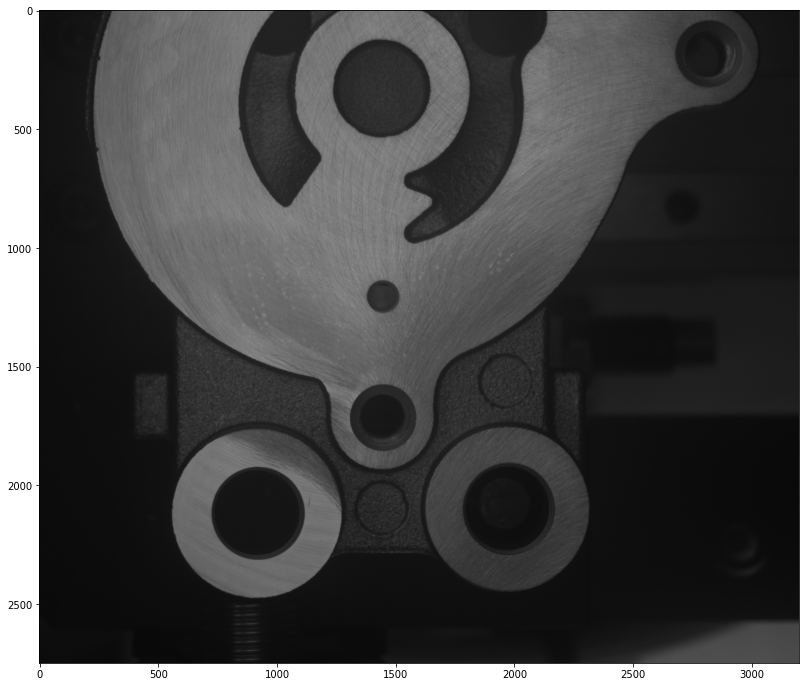

In [31]:
drawer.show(figsize=(23, 12))

In [32]:
img_object = eop_data.img_object
defect_list = eop_data.defect_list
total_time = 0

## Grid